# Modelo 01

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

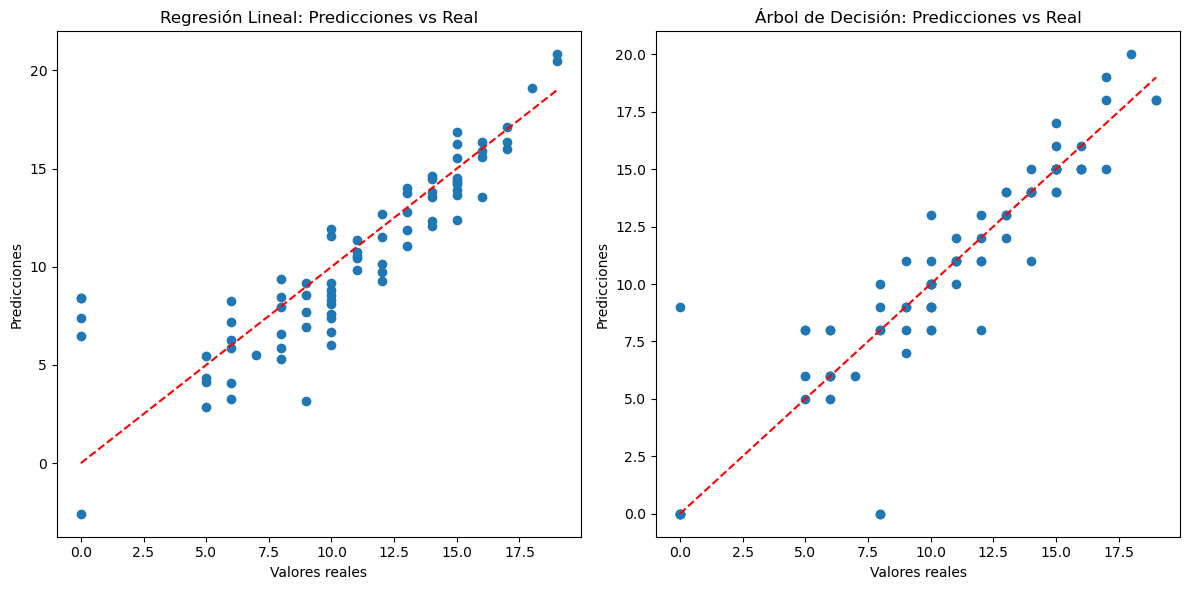

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

file_path = 'student-mat.csv' 
df = pd.read_csv(file_path, delimiter=';')
print(df.head())
print(df.info())
df_dummies = pd.get_dummies(df, drop_first=True)

X = df_dummies.drop(columns=['G3'])  # G3-variable objetivo
y = df_dummies['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Modelo de Regresión Lineal:")
print(f"MSE: {mse_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R2: {r2_lr}")

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("\nModelo de Árbol de Decisión:")
print(f"MSE: {mse_dt}")
print(f"RMSE: {rmse_dt}")
print(f"R2: {r2_dt}")

print("\nComparación de Modelos:")
print(f"Regresión Lineal - R2: {r2_lr}")
print(f"Árbol de Decisión - R2: {r2_dt}")

# Hiperparámetros para el modelo de árbol, se usa GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_dt_model = grid_search.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test)
mse_best_dt = mean_squared_error(y_test, y_pred_best_dt)
rmse_best_dt = np.sqrt(mse_best_dt)
r2_best_dt = r2_score(y_test, y_pred_best_dt)

print("\nMejor Modelo de Árbol de Decisión (con GridSearchCV):")
print(f"MSE: {mse_best_dt}")
print(f"RMSE: {rmse_best_dt}")
print(f"R2: {r2_best_dt}")
plt.figure(figsize=(12, 6))

# Regresión Lineal
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.title("Regresión Lineal: Predicciones vs Real")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Árbol de Decisión
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt)
plt.title("Árbol de Decisión: Predicciones vs Real")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.tight_layout()
plt.show()